### Linear Regression

y = mx + c

This notebook covers the following concepts

1- Visualization

2- Seaborn

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8, 5]

# import warnings
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

### Traning Data Preprocessing
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.
As such, data pre-processing addressess:
 - Assumptions about data shape
 - Incorrect data types
 - Outliers or errors
 - Missing values
 - Categorical variables

In [2]:
df = pd.read_csv('/kaggle/input/usa-housing/USA_Housing.csv')

#### Data Shape
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.

In [3]:
# Data shape
print('Training Data: ', df.shape)

Training Data:  (5000, 7)


In [4]:
# view the head of the dataset
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### Missing Data
We will check the missing values if this dataset exist.

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

This dataset doesn't have any missing values

In [7]:
# Remove the Address feature
df.drop('Address', axis=1, inplace=True)

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [9]:
# check the five number summary of the data
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Getting the Model Ready

Now that we've explored the data, it is time to get these features 'model ready'. Categorical features will need to be converted into 'dummy variables'; Otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [10]:
# shape of the train data
df.shape

(5000, 6)

Now the training data is perfect for a machine learning algorithm:

- All the data is numeric
- Everything is concatenated together

## Objective2 : Machine Learning

Next, I will split the full dataset into input and target variables, Input is also called **Feature Variables** Output regeres to **Target Variable**

In [11]:
# Split data to be used in the models
# Create matric of features
X = df.drop('Price', axis=1) # Grab all features except 'Price'

# Create Target Variable
y = df['Price'] # y is the column we are going to predict

In [12]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_transform = scaler.fit_transform(X)

In [13]:
# represent the X feature
X.shape

(5000, 5)

In [14]:
# Transform the target variable
y = np.array(y).reshape(-1, 1)

# fit the scaler to the data
scaler.fit(y)

# transform the y variable
y_transform = scaler.transform(y)

In [15]:
# represent the y feature
y.shape

(5000, 1)

In [16]:
# X and y variables to split the train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=101)

In [17]:
# check the training and testing data shapes
X_train.shape, y_train.shape

((4000, 5), (4000, 1))

In [18]:
X_test.shape, y_test.shape

((1000, 5), (1000, 1))

### Linear Regression Model

- Calling the Model
- Train the Model
- Predict the Price

In [19]:
from sklearn.linear_model import LinearRegression

# Call the model

lreg = LinearRegression()

# fit the model
lreg.fit(X_train, y_train)

LinearRegression()

### Testing the Model
##### class prediction

In [20]:
# Predict
y_pred = lreg.predict(X_test)
print(y_pred.shape)

(1000, 1)


In [21]:
# y_test = y_test.flatten()
# y_pred = y_test.flatten()

In [22]:
# sns.scatterplot(x = y_test, y = y_pred, color='blue', label='Actual Data Points')
# plt.plot([min(y_pred), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
# plt.legend()
# plt.show()

In [23]:
# combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print('Actual Values | Predicted Values')
print('-----------------------------------')

for actual, predicted in results:
    print(f'{actual: .2f} | {predicted: .2f}')

Actual Values | Predicted Values
-----------------------------------
 0.06 |  0.07
-1.02 | -1.16
 1.32 |  1.44
-0.48 | -0.74
-0.80 | -0.68
-1.42 | -1.67
-0.18 | -0.45
-1.49 | -1.06
 0.76 |  0.60
 0.16 | -0.08
 0.59 |  0.63
 0.13 |  0.19
 1.48 |  1.43
 0.79 |  0.30
 0.59 |  0.44
-0.32 | -0.03
-1.43 | -1.75
-0.26 | -0.76
-0.45 | -0.03
 0.44 | -0.10
-2.34 | -2.06
 0.62 |  1.52
 1.54 |  1.76
-0.09 | -0.09
-0.36 | -0.47
 1.71 |  1.64
 1.60 |  1.52
 0.54 |  0.59
 0.38 |  0.44
 0.74 |  0.88
-1.72 | -1.43
 1.69 |  1.48
 0.97 |  0.65
-0.51 | -0.58
 0.63 |  0.15
-0.73 | -0.89
-0.19 | -0.13
-0.99 | -0.66
 0.28 |  0.28
-1.38 | -1.27
 0.51 |  0.46
-1.44 | -1.85
-1.43 | -1.16
 1.74 |  1.88
 1.35 |  1.25
-0.88 | -0.75
 0.03 | -0.29
-0.99 | -1.24
-0.51 | -0.20
 0.82 |  0.68
 0.86 |  0.64
-0.03 | -0.20
 0.14 | -0.38
-0.08 |  0.36
-1.29 | -1.11
-0.25 | -0.70
-0.24 | -0.31
-0.29 |  0.06
 0.44 |  0.56
-1.43 | -2.08
 0.76 |  0.65
-0.49 | -0.35
-1.36 | -1.62
 0.04 |  0.04
 0.61 |  0.31
 0.34 |  0.36
-1.26 |

### Residual Analysis
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In [24]:
residual = actual - y_pred.reshape(-1)
print(residual)

[-1.97469102e-01  1.03682470e+00 -1.56471213e+00  6.11032455e-01
  5.51640825e-01  1.54091776e+00  3.23678323e-01  9.39194255e-01
 -7.28219352e-01 -4.57267561e-02 -7.57884409e-01 -3.12561040e-01
 -1.55127413e+00 -4.21230088e-01 -5.64855681e-01 -9.68807968e-02
  1.62684613e+00  6.35158799e-01 -9.34638960e-02 -2.79671152e-02
  1.93250968e+00 -1.64525280e+00 -1.88535155e+00 -3.44753127e-02
  3.48552586e-01 -1.76683121e+00 -1.64406306e+00 -7.12932783e-01
 -5.63764049e-01 -9.99714506e-01  1.30784823e+00 -1.60387736e+00
 -7.75991418e-01  4.60506559e-01 -2.73958743e-01  7.66796512e-01
  3.25683927e-03  5.34906348e-01 -4.00302555e-01  1.14988846e+00
 -5.80813994e-01  1.72758582e+00  1.03532093e+00 -2.00331822e+00
 -1.37028378e+00  6.26682276e-01  1.65746976e-01  1.11984970e+00
  7.68650731e-02 -8.04910985e-01 -7.63164317e-01  7.15344461e-02
  2.51338562e-01 -4.81220832e-01  9.83037567e-01  5.71749331e-01
  1.83734357e-01 -1.85060956e-01 -6.79962638e-01  1.95165163e+00
 -7.77779547e-01  2.25025

<Axes: ylabel='Density'>

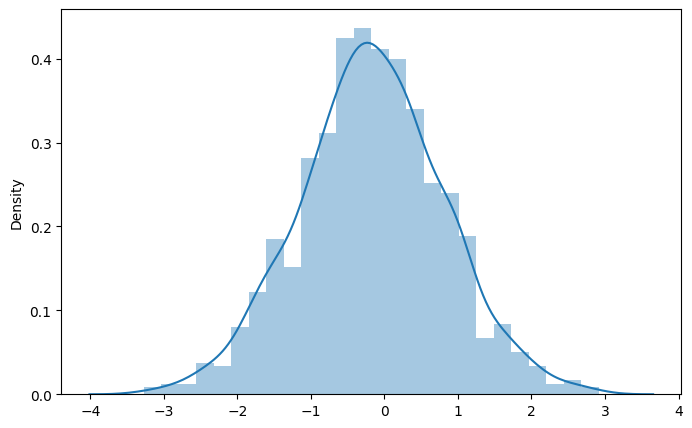

In [25]:
# Distribution plot for residual (difference between actual and predicted values)

sns.distplot(residual, kde=True)

This distribution represents that our model is not skewed as the distribution is center aligned, but the values of X and y are in power of 6, Which means the difference between actual and predicted value is high

### Model Evaluation

In [26]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')

# Results
print('------------------------------------')
# Mean_squared_error(y_test, y_pred)
mse_lreg = mean_squared_error(y_test, y_pred)
rmse_lreg = np.sqrt(mse_lreg)

# print the evaluation metrics
print('MSE of Linear Regression: ', mse_lreg)
print('RMSE of Linear Regression: ', rmse_lreg)

Linear Regression Model
------------------------------------
MSE of Linear Regression:  0.08101725519794249
RMSE of Linear Regression:  0.2846353020936484


### Decision Tree Model
Predicting the house prices using Decsision Tree model

In [27]:
from sklearn.tree import DecisionTreeRegressor

# Call the model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predicting the saleprices
y_pred_dtr = dtr.predict(X_test)

mse_dtr = mean_squared_error(y_pred_dtr, y_test)
rmse_dtr = np.sqrt(mse_dtr)

# Decision Tree Regressor accuracy
print('MSE of Decision Tree Regression: ', mse_dtr)
print('RMSE of Decision Tree Regression: ', rmse_dtr)

MSE of Decision Tree Regression:  0.2557647909424636
RMSE of Decision Tree Regression:  0.5057319358538311


### Random Forest Model

Predicting the house prices using Random Forest model

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Call the model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predicting the saleprices
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_pred_rf, y_test)
rmse_rf = np.sqrt(mse_rf)

# Decision Tree Regressor accuracy
print('MSE of Random Forest Regression: ', mse_rf)
print('RMSE of Random Forest Regression: ', rmse_rf)

MSE of Random Forest Regression:  0.1207479291011197
RMSE of Random Forest Regression:  0.3474880272773721


### Gradient Boosting Regression

Predicting the house prices using Gradient Boosting model

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Call the model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Predicting the saleprices
y_pred_rf = gbr.predict(X_test)

mse_gbr = mean_squared_error(y_pred_rf, y_test)
rmse_gbr = np.sqrt(mse_gbr)

# Decision Tree Regressor accuracy
print('MSE of Gradient Boosting Regression: ', mse_gbr)
print('RMSE of Gradient Boosting Regression: ', rmse_gbr)

MSE of Gradient Boosting Regression:  0.0994710201676728
RMSE of Gradient Boosting Regression:  0.31539026644408796


Compare the models

In [30]:
# sample model scores
model_scores = {
    'Linear Regression ': 0.24725538949563602,
    'Decision Tree ': 0.24725538949563602,
    'Random Forest ': 0.12147632702442818,
    'Gradient Boosting ': 0.09953740950555696
}

# Sort the model scores in ascending order based on their values
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# display the ranking of the models
print('Model Rankings (lower values are better): ')
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f'{rank}.{model_name} : {score}')

Model Rankings (lower values are better): 
1.Gradient Boosting  : 0.09953740950555696
2.Random Forest  : 0.12147632702442818
3.Linear Regression  : 0.24725538949563602
4.Decision Tree  : 0.24725538949563602
